### Importing Necessary Libraries for Data Preparation & Util Functions

In [1]:
######################################################################################################################
#                               Import Python Files for Sentence & Annotations Extraction                            #
#                                        Provided as a Simple API on Github                                          #
#                                https://github.com/BryanPlummer/flickr30k_entities                                  #
######################################################################################################################

# Uncomment the below line once every session, in order for the code to run smoothly
!pip install imagesize

import os
os.chdir(r"/kaggle/input/vgrutils/Visual Grounding RefEx/Flickr30/")

import Utils.flickr30k_entities_utils
from Utils.flickr30k_entities_utils import get_sentence_data, get_annotations

import Utils.helper_functions
from Utils.helper_functions import *

import random 
import seaborn as sb





### Driver Functions

In [2]:
######################################################################################################################
#                                                                                                                    #
#                                                   Mapping Function                                                 #
#                                                                                                                    #
######################################################################################################################
"""
Mapping Function does the following,
    - takes list of Image names as i/p and fetch Sentences & Annotations (contains bounding boxes)of all those Images
    - passes those Sentences & Annotations to the func Phrase_Id_to_Bbox & gets Bounding Boxes for all phrases
    in every image.
    - also, passes those Sentences & Annotations to the func Phrase_Id_to_Phrases & extracts phrases contained in all
    images.
    
    A typical look of the outputs would be:
    
        _Image_Train_Phrase_Id_to_Bbox -----> {'image_id_1' : {'Phrase_id_1' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_2' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_3' : [Bbox1, Bbox2 ... Bboxn],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Bbox1, Bbox2 ... Bboxn]}
                                                              
                                                'image_id_2' : {'Phrase_id_1' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_2' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_3' : [Bbox1, Bbox2 ... Bboxn],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Bbox1, Bbox2 ... Bboxn]}
                                                              
                                                              
                                                              
                                                              .
                                                              .
                                                              .
                                                              .
                                                              .
                                                              .
                                                              
                                                              
                                                'image_id_n' : {'Phrase_id_1' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_2' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_3' : [Bbox1, Bbox2 ... Bboxn],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Bbox1, Bbox2 ... Bboxn]}
                                                              
                                                              }
                                                              
                                                              
        _Image_Train_Phrase_Id_to_Phrase -----> {'image_id_1' : {'Phrase_id_1' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_2' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_3' : [Phrase1, Phrase2.... Phrase_n],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Phrase1, Phrase2.... Phrase_n]}
                                                              
                                                'image_id_2' : {'Phrase_id_1' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_2' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_3' : [Phrase1, Phrase2.... Phrase_n],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Phrase1, Phrase2.... Phrase_n]}
                                                              
                                                              
                                                              
                                                              .
                                                              .
                                                              .
                                                              .
                                                              .
                                                              .
                                                              
                                                              
                                                'image_id_n' : {'Phrase_id_1' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_2' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_3' : [Phrase1, Phrase2.... Phrase_n],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Phrase1, Phrase2.... Phrase_n]}
                                                              
                                                              }
        

NOTE: Please alter any folder paths for Images, Sentences and Annotations (Phrase & Bounding Boxes) in Helper Function File


"""



from collections import defaultdict
def Mapping(_Image_Names, _paths_dict):
    _Phrase_Id_to_Bbox = defaultdict()
    _Phrase_Id_to_Phrase = defaultdict()

    for _img in tqdm(_Image_Names):
        _img_sentences_path, _img_annotations_path, _img_absolute_path = get_Paths(_img, _paths_dict)
        sents = get_sentence_data(_img_sentences_path)
        anns = get_annotations(_img_annotations_path)
        _Phrase_Id_to_Bbox[_img] = phrase_Id_to_Bbox(sents, anns)
        _Phrase_Id_to_Phrase[_img] = phrase_Id_to_Phrases(sents, anns)
        
        
    return _Phrase_Id_to_Bbox, _Phrase_Id_to_Phrase




### Driver Code

In [3]:
_paths_dict = {
                '_sentences_path' : r'/kaggle/input/vgrutils/Visual Grounding RefEx/Flickr30/Data/annotations/Sentences',
                '_annotations_path' : r'/kaggle/input/vgrutils/Visual Grounding RefEx/Flickr30/Data/annotations/Annotations',
                '_image_folder_path' : r'/kaggle/input/flickr30k/flickr30k_images'
                }
_train_len = 5000 #len(_trainimg)



In [4]:
"""
######################################################################################################################
#                                                                                                                    #
#                       Enter path for train, val & test split in their respective variables                         #
#                                                                                                                    #
######################################################################################################################


train.txt, val.txt and test.txt are text files that contains predefined splits, i.e each file contains the split it
belongs to.

train.txt contains all image names as strings, that should be used for training
val.txt contains all image names as strings, that should be used for validation
test.txt contains all image names as strings, that should be used for testing

"""

_trainimg = load_Splits('/kaggle/input/vgrutils/Visual Grounding RefEx/Flickr30/Data/Splits/train.txt')
_vlimg = load_Splits('/kaggle/input/vgrutils/Visual Grounding RefEx/Flickr30/Data/Splits/val.txt')
_tsimg = load_Splits('/kaggle/input/vgrutils/Visual Grounding RefEx/Flickr30/Data/Splits/test.txt')


In [5]:
"""
######################################################################################################################
#                                                                                                                    #
#                                                 Call to the Mapping Functions                                      #
#                                                                                                                    #
######################################################################################################################
"""


_Image_Train_Phrase_Id_to_Bbox, _Image_Train_Phrase_Id_to_Phrase = Mapping(_trainimg, _paths_dict)
_Image_Val_Phrase_Id_to_Bbox, _Image_Val_Phrase_Id_to_Phrase = Mapping(_vlimg, _paths_dict)
_Image_Test_Phrase_Id_to_Bbox, _Image_Test_Phrase_Id_to_Phrase = Mapping(_tsimg, _paths_dict)



  0%|          | 0/29783 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
"""
######################################################################################################################
#                                                                                                                    #
#                                                Converting to DataFrames.                                           #
#                                                                                                                    #
######################################################################################################################
"""



_Fractional_Train_Set_Pid_to_P = {img : _Image_Train_Phrase_Id_to_Phrase[img] for img in _trainimg[:_train_len]}
_Fractional_Train_Set_Pid_to_B = {img : _Image_Train_Phrase_Id_to_Bbox[img] for img in _trainimg[:_train_len]}


Test_Frame = prepare_DataFrame(_Image_Test_Phrase_Id_to_Phrase, _Image_Test_Phrase_Id_to_Bbox)
Val_Frame = prepare_DataFrame(_Image_Val_Phrase_Id_to_Phrase, _Image_Val_Phrase_Id_to_Bbox)
Train_Frame = prepare_DataFrame(_Fractional_Train_Set_Pid_to_P, _Fractional_Train_Set_Pid_to_B)




  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

In [7]:

"""
######################################################################################################################
#                                                                                                                    #
#                                        Fetch and Analyze all Image Sizes                                           #
#                                              IRREGULAR SIZES                                                       #
#                                                                                                                    #
######################################################################################################################
"""
# _all_images = _trainimg + _vlimg + _tsimg
# aspects = get_Image_Sizes(_all_images, _paths_dict)


'\n######################################################################################################################\n#                                                                                                                    #\n#                                        Fetch and Analyze all Image Sizes                                           #\n#                                              IRREGULAR SIZES                                                       #\n#                                                                                                                    #\n######################################################################################################################\n'

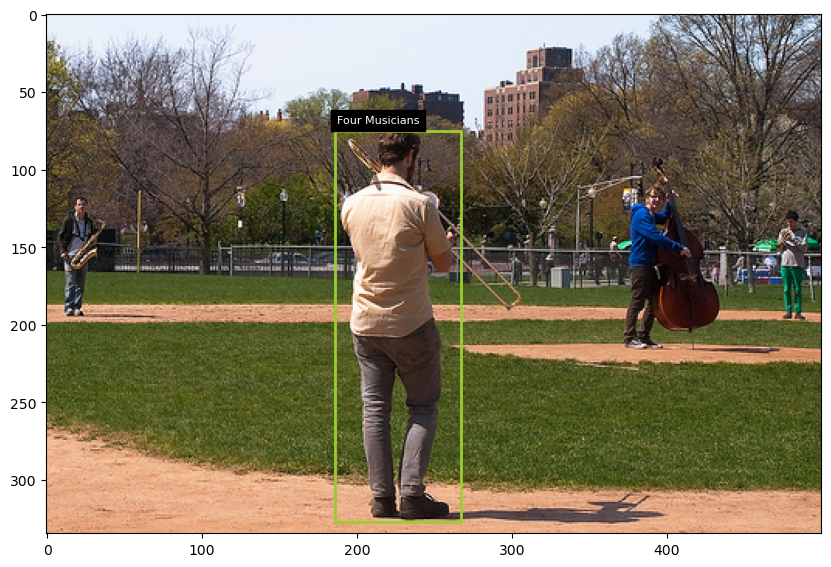

In [8]:

"""
######################################################################################################################
#                                                                                                                    #
#                              Demnostrating Phrase & Boxes by picking a Random Image                                #
#                                                 SINGLE PATCH                                                       #
#                                                                                                                    #
######################################################################################################################
"""


rw = Test_Frame.sample().reset_index()
plot_patches(rw['Image_Id'].at[0], rw['Bounding_Box'].at[0], rw['Phrase'].at[0], _paths_dict, _Single_Patch = True)



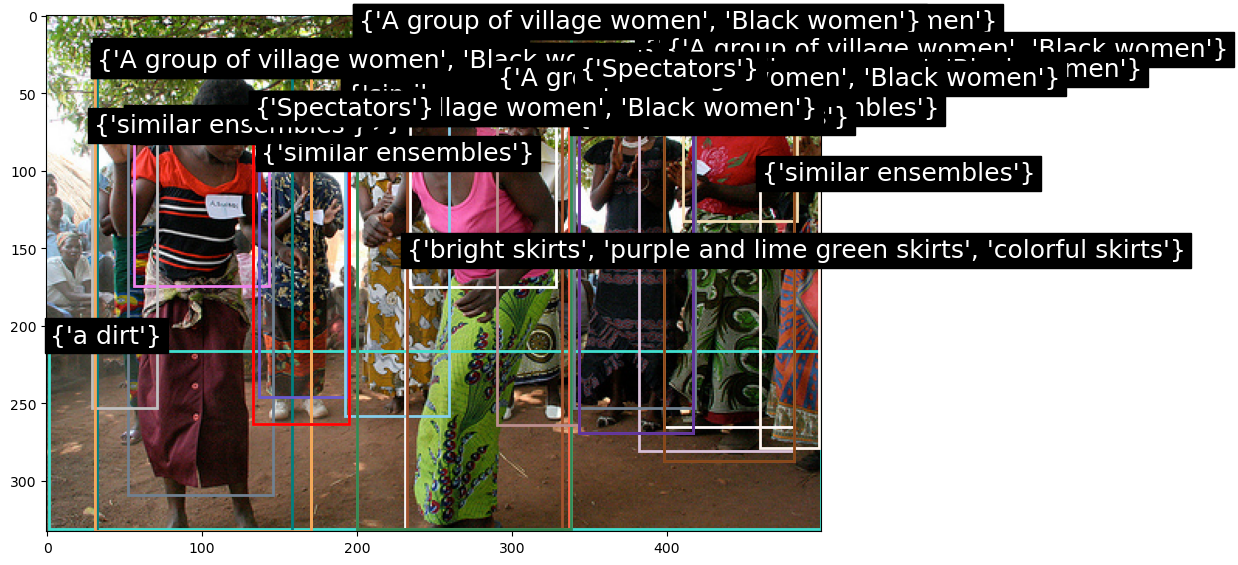

In [9]:

"""
######################################################################################################################
#                                                                                                                    #
#                              Demnostrating Phrase & Boxes by picking a Random Image                                #
#                                                    ALL PATCHES                                                     #
#                                                                                                                    #
######################################################################################################################
"""


im = random.choice(_trainimg)
plot_patches(_Image_id = im, _Bboxes = _Image_Train_Phrase_Id_to_Bbox, _Phrs = _Image_Train_Phrase_Id_to_Phrase, _paths= _paths_dict)




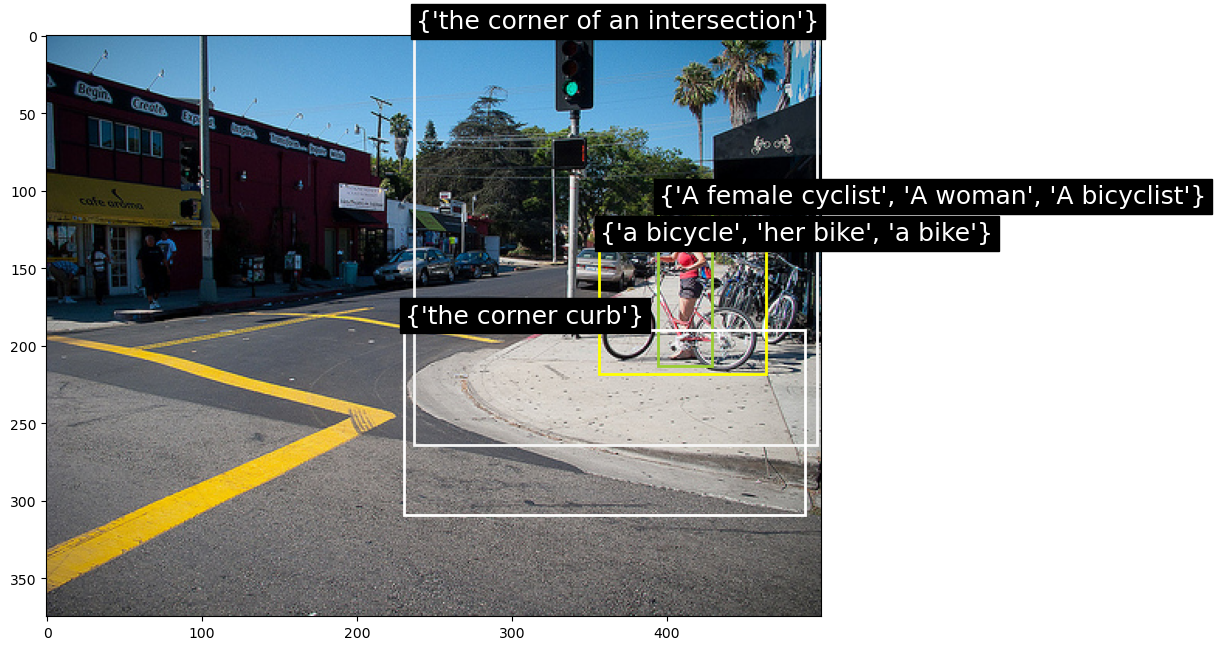

In [10]:

"""
######################################################################################################################
#                                                                                                                    #
#                              Demnostrating Phrase & Boxes by picking a Random Image                                #
#                                                    ALL PATCHES                                                     #
#                                                                                                                    #
######################################################################################################################
"""


im = random.choice(_trainimg)
plot_patches(_Image_id = im, _Bboxes = _Image_Train_Phrase_Id_to_Bbox, _Phrs = _Image_Train_Phrase_Id_to_Phrase, _paths= _paths_dict)




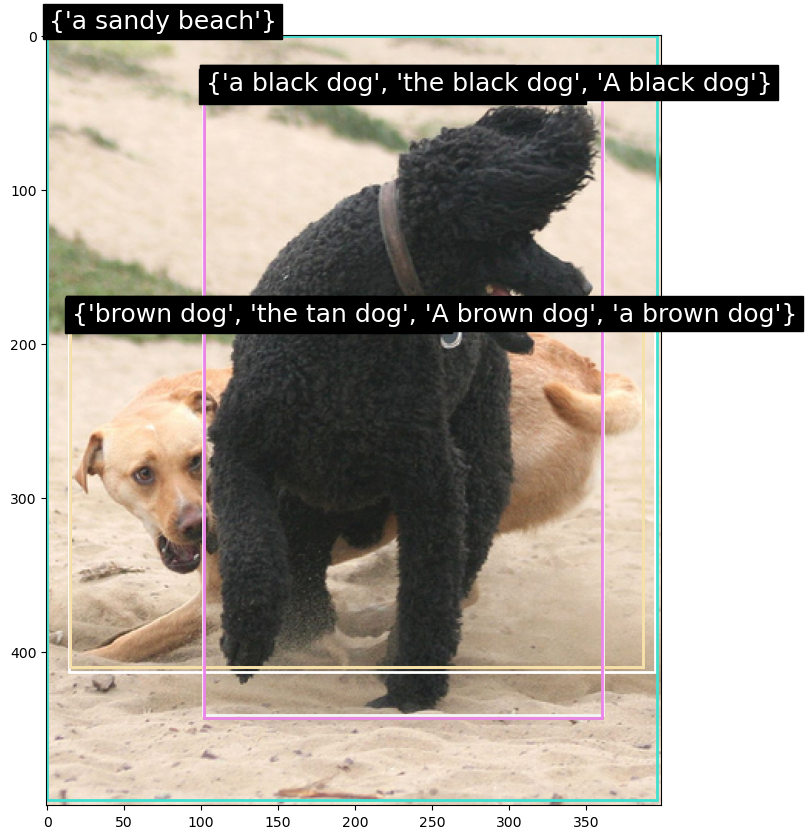

In [11]:

"""
######################################################################################################################
#                                                                                                                    #
#                              Demnostrating Phrase & Boxes by picking a Random Image                                #
#                                                    ALL PATCHES                                                     #
#                                                                                                                    #
######################################################################################################################
"""


im = random.choice(_trainimg)
plot_patches(_Image_id = im, _Bboxes = _Image_Train_Phrase_Id_to_Bbox, _Phrs = _Image_Train_Phrase_Id_to_Phrase, _paths= _paths_dict)




In [12]:

"""
######################################################################################################################
#                                                                                                                    #
#                              Demnostrating Phrase & Boxes by picking a Random Image                                #
#                                                    ALL PATCHES                                                     #
#                                                                                                                    #
######################################################################################################################
"""


im = random.choice(_trainimg)
plot_patches(_Image_id = im, _Bboxes = _Image_Train_Phrase_Id_to_Bbox, _Phrs = _Image_Train_Phrase_Id_to_Phrase, _paths= _paths_dict)




In [13]:
"""
######################################################################################################################
#                                                                                                                    #
#               Demnostration Purpose as to What do extracted files look like from GIT Programs                      #
#                                                                                                                    #
######################################################################################################################
"""

im = random.choice(_trainimg)
_img_sentences_path, _img_annotations_path, _img_absolute_path = get_Paths(im, _paths_dict)
sents = get_sentence_data(_img_sentences_path)
anns = get_annotations(_img_annotations_path)

